# Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

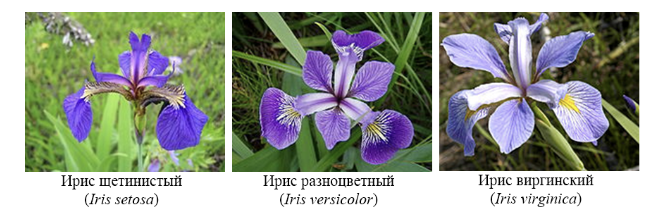

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.shape

(150, 6)

In [12]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Описательная статистика

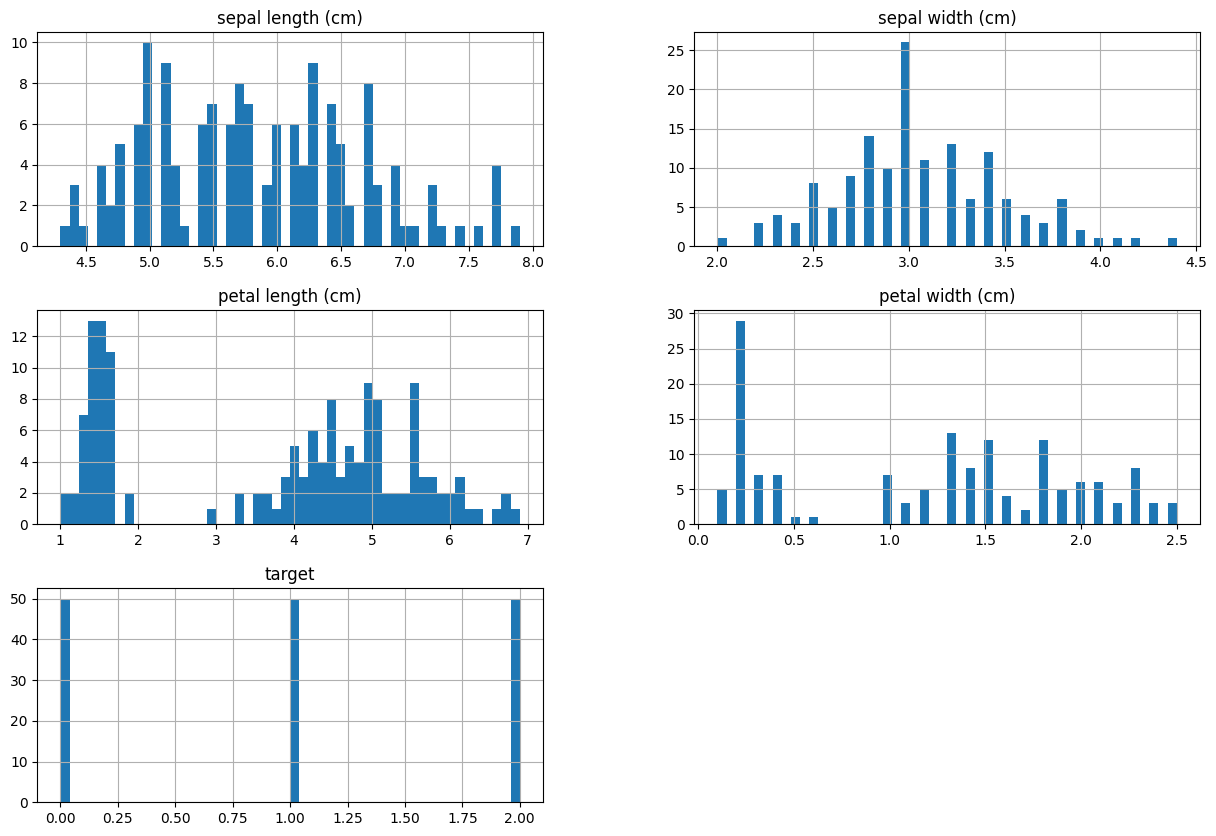

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);

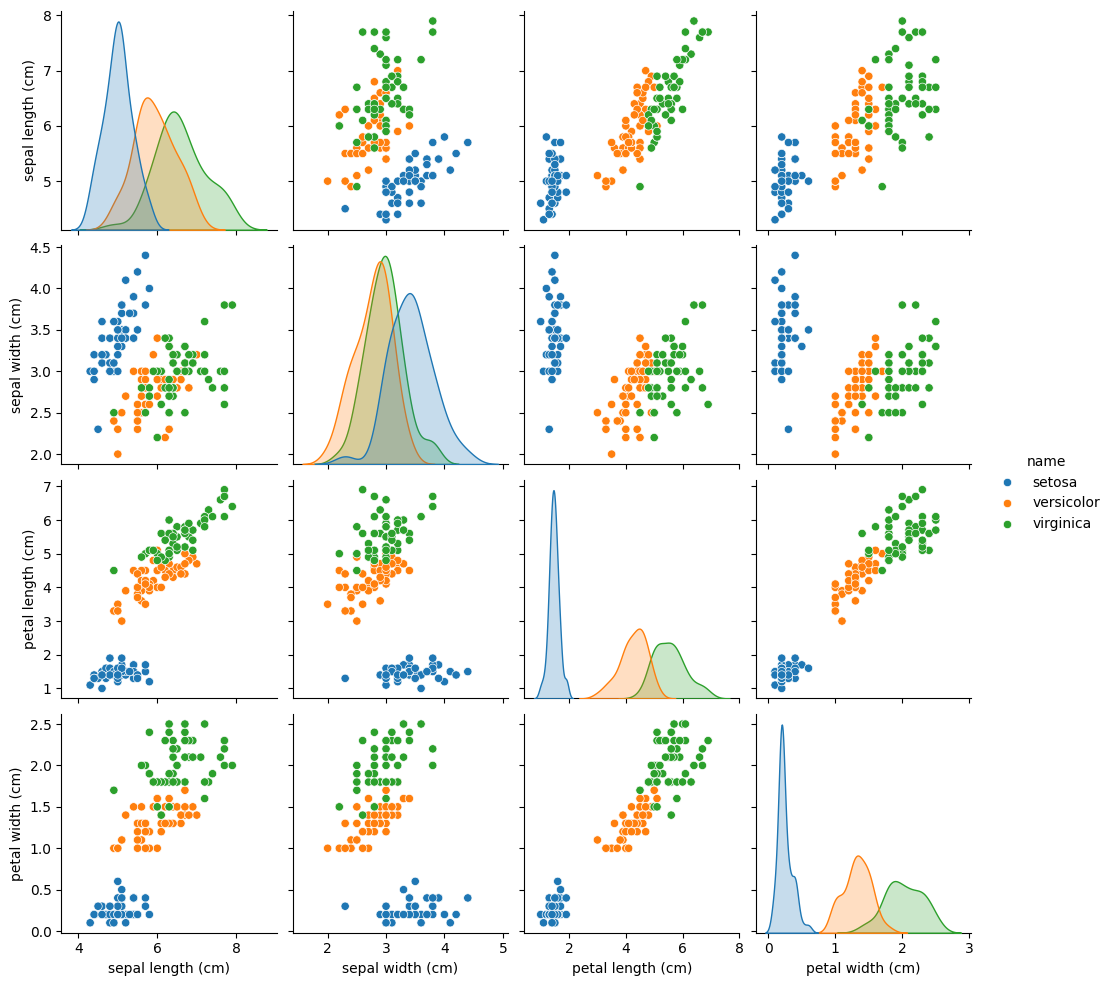

In [17]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

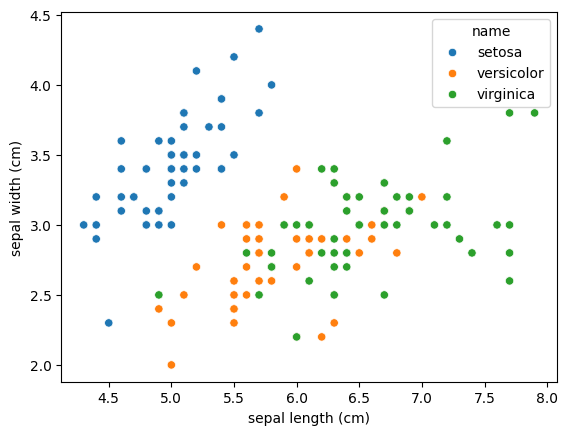

In [18]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

In [19]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

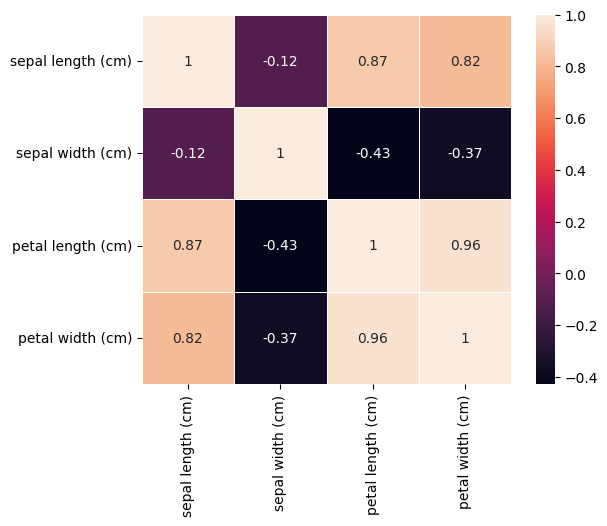

In [20]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

## Обучение классификатора

In [308]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, f1_score

Первым делом разделим данные на тренировочную и тестовую выборки

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

Так как данные больше не требуют обработки, перейдём к классификации

### AI-классификатор 

Первым делом классифицируемы ирисы при помощи нейронной сети, состоящей из 3 полносвязных слоёв

In [310]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(4,), activation='relu', name='input'),
    tf.keras.layers.Dense(15, activation='relu', name='hidden'),
    tf.keras.layers.Dense(5, activation='softmax', name='output'),
])


Инициализируем коллбэк на остановку со слежкой на функцию потерь

In [311]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

Компилируем модель

In [312]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [313]:
print(model.summary())

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 30)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 5)                   │              80 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 695 (2.71 KB)

 Trainable params: 695 (2.71 KB)

 Non-trainable params: 0 (0.00 B)

None


Обучаем нейросеть

In [314]:
History = model.fit(X_train, y_train, epochs=400, batch_size=16, validation_data=(X_test, y_test),callbacks = [early_stop])

Epoch 1/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 1.7954 - val_accuracy: 0.0000e+00 - val_loss: 1.7091
Epoch 2/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.6720 - val_accuracy: 0.1556 - val_loss: 1.6031
Epoch 3/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2952 - loss: 1.5759 - val_accuracy: 0.3333 - val_loss: 1.5300
Epoch 4/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3333 - loss: 1.5090 - val_accuracy: 0.3333 - val_loss: 1.4682
Epoch 5/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 1.4482 - val_accuracy: 0.3333 - val_loss: 1.4232
Epoch 6/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3714 - loss: 1.4029 - val_accuracy: 0.4667 - val_loss: 1.3772
Epoch 7/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4762 - loss: 1.3565 - val_accuracy: 0.5556 - val_loss: 1.3296
Epoch 8/400
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6476 - loss: 1.3078 - val_accuracy: 0.6444 - val

Смотрим на графики точноки валидации и обучения

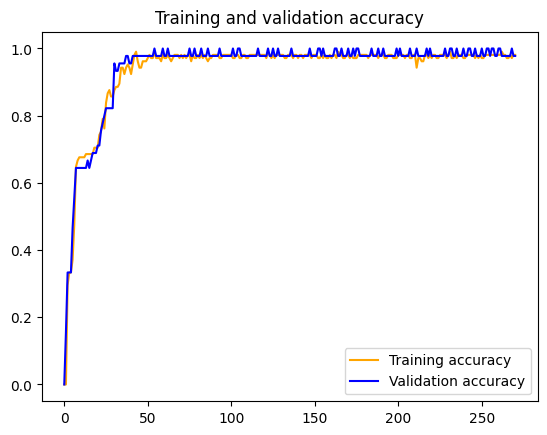

<Figure size 640x480 with 0 Axes>

In [315]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Для полноты картины смотрим на глобальную  точность и функцию потерь

In [316]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9778 - loss: 0.0353
Model accuracy on test data: 97.78%


Для идеального набора данных результат неплохой

Странный момент, делаем предикт на данных в которые выходит и обучающая выборка!!!

In [317]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
predictions = model.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [318]:
predictions

array([[9.99808729e-01, 1.91268744e-04, 3.76047858e-15, 3.18267938e-12,
        2.86889800e-11],
       [9.99459922e-01, 5.40087989e-04, 1.05470937e-13, 3.92000356e-11,
        2.80525464e-10],
       [9.99647141e-01, 3.52831965e-04, 3.97682646e-14, 2.09835135e-11,
        1.61612404e-10],
       [9.99013305e-01, 9.86688654e-04, 3.92837943e-13, 1.09206824e-10,
        6.59483801e-10],
       [9.99814928e-01, 1.85134835e-04, 3.24711457e-15, 2.94729085e-12,
        2.63692158e-11],
       [9.99491811e-01, 5.08142926e-04, 8.06116428e-15, 3.97001355e-12,
        3.18575270e-11],
       [9.99352038e-01, 6.47999637e-04, 1.03331447e-13, 3.90544611e-11,
        2.70027556e-10],
       [9.99636054e-01, 3.63923697e-04, 1.81032218e-14, 1.01104741e-11,
        7.78498654e-11],
       [9.98819053e-01, 1.18089712e-03, 1.13391447e-12, 2.61935085e-10,
        1.50069990e-09],
       [9.99521136e-01, 4.78905422e-04, 5.77178550e-14, 2.59528701e-11,
        1.85342158e-10],
       [9.99862432e-01, 1.3754

In [319]:
test = np.argmax(predictions,axis=1)
prediction = test.flatten()

In [320]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Смотрим на типичные метрики классификации

In [321]:
y = iris_df['target']
print(classification_report(y, prediction))
print(f1_score(y_true=y, y_pred=prediction, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

0.9799819837854068


F1 score в данном случае равен ~0.98, что вполне приемлимо

### KNN

В качестве простой модели возьмём KNN, обучим и сделаем предсказание

In [250]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [251]:
predict = knn.predict(X_test)

In [252]:
print(classification_report(y_test, predict))
print(f1_score(y_true=y_test, y_pred=predict, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777313363520261


F1 score вышел 0.978, что довольно близко к нейросети. Это обусловлено тем, что набор данных идеален и не настолько большой, чтобы требовать обучение на сложных моделях

### GradientBoostingClassifier

И наконец в качестве ансамбилевого метода возьмём градиентный бустинг

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

gbf = GradientBoostingClassifier(
    random_state=0,
    n_estimators=1000,
    max_depth=3,
    verbose=1,
)
gbf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9118            1.87s
         2           0.7667            1.93s
         3           0.6505            1.86s
         4           0.5555            1.87s
         5           0.4768            1.83s
         6           0.4107            1.80s
         7           0.3550            1.77s
         8           0.3077            1.84s
         9           0.2673            1.84s
        10           0.2326            1.81s
        20           0.0653            1.70s
        30           0.0206            1.66s
        40           0.0071            1.62s
        50           0.0028            1.60s
        60           0.0011            1.59s
        70           0.0004            1.57s
        80           0.0002            1.55s
        90           0.0001            1.54s
       100           0.0000            1.52s
       200           0.0000            1.31s
       300           0.0000            1.00s
       40

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Видно, что функция потерь значительно уменьшается лишь до того, когда кол-во деревьев =90

In [276]:
predict = gbf.predict(X_test)

In [277]:
print(classification_report(y_test, predict))
print(f1_score(y_true=y_test, y_pred=predict, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

0.9552754435107376


F1 score равный 0.95 всё ещё хорош, но на удивление результат меньше чем у простого KNN

# Вывод

Данные о ирисах были проанализированы, разделены на выборки для обучения и теста.  
3 разные модели были обучены.  

В результате оценки качества предсказаний всех моделей, можно сделать вывод, что на столь чистом и маленьком наборе данных парктически нет разницы, что за модель использовать, так как любая из них покажет высокие результаты.